# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

* rougher — флотация 
* primary_cleaner — первичная очистка 
* secondary_cleaner — вторичная очистка 
* final — финальные характеристики 

блок [тип_параметра]: 
* input — параметры сырья 
* output — параметры продукта 
* state — параметры, характеризующие текущее состояние этапа 
* calculation — расчётные характеристики 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-данных" data-toc-modified-id="Открытие-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и изучение данных</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения" data-toc-modified-id="Расчёт-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Открытие и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
def analyze(df):
    rows_count, columns_count = df.shape
    print('Количество стобцов:', columns_count)
    print('Количество строк:', rows_count)
    print('Дубликатов:', df.duplicated().sum())
    display(df.head())
    df.info()
    display(df.describe())

In [4]:
analyze(train)

Количество стобцов: 86
Количество строк: 14149
Дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [5]:
analyze(test)

Количество стобцов: 52
Количество строк: 5290
Дубликатов: 0


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [6]:
analyze(full)

Количество стобцов: 86
Количество строк: 19439
Дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Вывод:

* В данных есть пропуски
* В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей выборке

### Расчёт эффективности обогащения

Эффективность обогащения рассчитывается по формуле
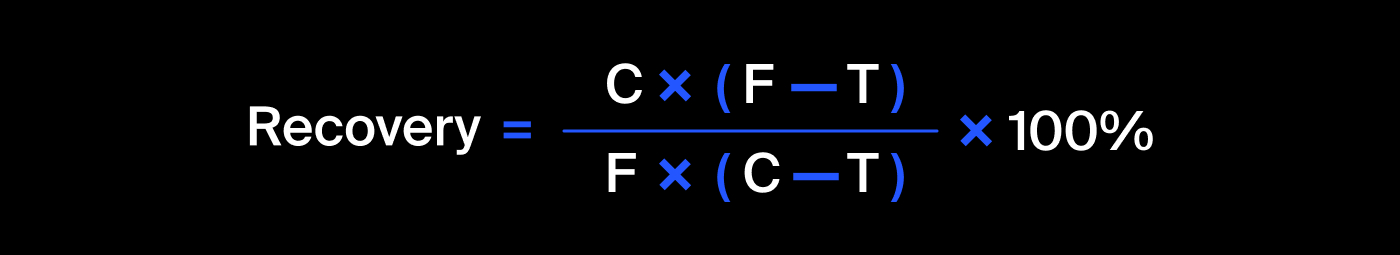

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
def calculate_recovery(c,f,t):
    recovery = (c*(f-t)) / (f*(c-t)) * 100
    
# Заполним слишком маленькие и слишком большие значения с помощью np.nan
    recovery[recovery<0] = np.nan
    recovery[recovery>100] = np.nan
    
    return recovery

In [8]:
#Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery
c = train['rougher.output.concentrate_au'].dropna()
f = train['rougher.input.feed_au'].dropna()
t = train['rougher.output.tail_au'].dropna()

recovery = calculate_recovery(c,f,t)
recovery.describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64

In [9]:
#Посчитаем MAE
mae = mean_absolute_error(train['rougher.output.recovery'], recovery)
print('Средняя абсолютная ошибка:', mae)

Средняя абсолютная ошибка: 9.73512347450521e-15


Вывод: 

MAE (средняя абсолютная ошибка) между рассчитаной эффективностью обогащения и значением признака очень мала, следовательно, значение эффективности указано верно.

### Анализ признаков, недоступных в тестовой выборке

In [10]:
#Найдем отсутсвующие признаки
set(train) - set(test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Выводы:

* Все признаки имеют тип float
* Признаки output - целевые признаки и поэтому отсутствуют в тестовой выборке
* Признаки rougher.calculation - это расчетные характеристики

### Предобработка данных

Рассчитаем долю пропущенных значений

In [11]:
(
    (train.isna().mean()*100)
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns = {0:'percent_space'})
    .style.background_gradient('coolwarm').format("{:.1f}")
)

,percent_space
secondary_cleaner.output.tail_sol,11.3
rougher.state.floatbank10_e_air,3.1
rougher.input.floatbank11_xanthate,3.0
primary_cleaner.output.concentrate_sol,2.0
secondary_cleaner.state.floatbank2_a_air,1.5
final.output.concentrate_sol,1.5
rougher.input.feed_size,1.0
rougher.input.feed_pb,0.7
final.output.tail_pb,0.7
primary_cleaner.input.xanthate,0.7


In [12]:
(
    (test.isna().mean()*100)
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns = {0:'percent_space'})
    .style.background_gradient('coolwarm').format("{:.1f}")
)

,percent_space
rougher.input.floatbank11_xanthate,0.5
rougher.input.feed_sol,0.4
secondary_cleaner.state.floatbank3_a_air,0.2
rougher.input.floatbank11_sulfate,0.2
primary_cleaner.input.depressant,0.1
rougher.input.floatbank10_sulfate,0.1
primary_cleaner.input.sulfate,0.1
primary_cleaner.input.xanthate,0.1
rougher.input.feed_rate,0.1
secondary_cleaner.state.floatbank2_a_air,0.1


In [13]:
#Добавим целевые показатели в датасет gold_recovery_test из датасета gold_recovery_full, в качестве ключа использовав date
TARGETS = ['rougher.output.recovery', 'final.output.recovery']
test = test.merge(full[TARGETS].loc[test.index], on='date', how='left')

In [14]:
#Удалим в обучающей и тестовой выборках строки с пропусками в целевых показателях
train = train.dropna(subset=TARGETS)
test = test.dropna(subset=TARGETS)

In [15]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

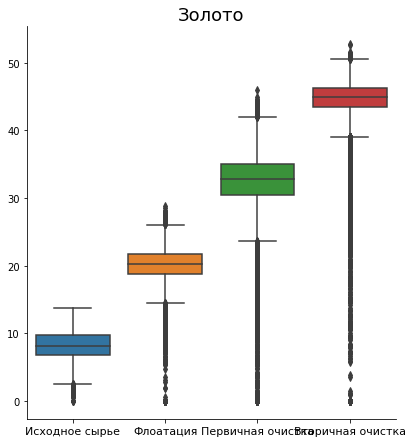

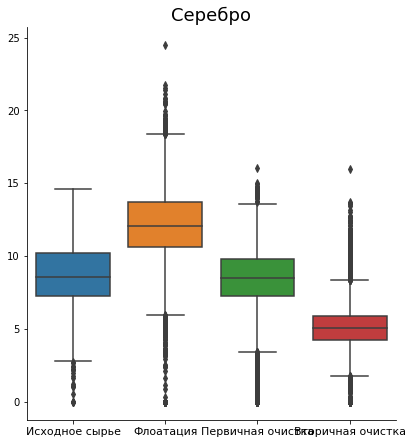

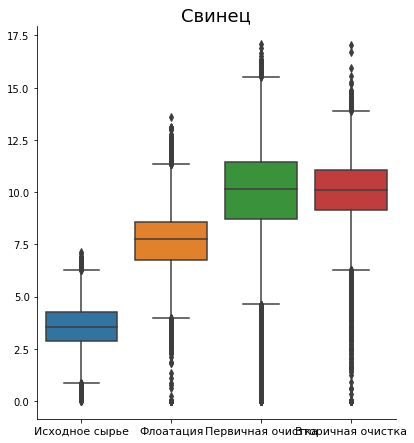

In [16]:
# Создадим выборки по металлам
au_conc = full[['rougher.input.feed_au',
                'rougher.output.concentrate_au',
                'primary_cleaner.output.concentrate_au',
                'final.output.concentrate_au']]
ag_conc = full[['rougher.input.feed_ag',
                'rougher.output.concentrate_ag',
                'primary_cleaner.output.concentrate_ag',
                'final.output.concentrate_ag']]
pb_conc = full[['rougher.input.feed_pb',
                'rougher.output.concentrate_pb',
                'primary_cleaner.output.concentrate_pb',
                'final.output.concentrate_pb']]
# визуализирую концентрацию по этапам
# визуализирую распределение по этапам
au= sns.catplot(data=au_conc, height = 6, kind='box')
au.set_xticklabels(['Исходное сырье', 'Флоатация','Первичная очистка','Вторичная очистка'], fontsize=11)
plt.title("Золото", fontsize=18) 
plt.show()
ag= sns.catplot(data=ag_conc, height = 6, kind='box')
ag.set_xticklabels(['Исходное сырье', 'Флоатация','Первичная очистка','Вторичная очистка'], fontsize=11)
plt.title("Серебро", fontsize=18) 
plt.show()
pb= sns.catplot(data=pb_conc, height = 6, kind='box')
pb.set_xticklabels(['Исходное сырье', 'Флоатация','Первичная очистка','Вторичная очистка'], fontsize=11)
plt.title("Свинец", fontsize=18) 
plt.show();

Вывод:
* С каждым этапом очистки доля золота увеличивается.
* Доля серебра увеличивается только на этапе флотации, далее его доля уменьшается.
* Доля свинца не меняется на этапах очистки. Как видно из графика распределения, уменьшается разброс значений.

### Сравнение распределения размеров гранул сырья

In [17]:
# Делаем таблицу с размерами гранул перед флоатацией тестовой и обучающей выборок
feeds = pd.concat([train['rougher.input.feed_size'], test['rougher.input.feed_size']], axis=1) 
feeds.columns = ['train', 'test']
feeds.describe()

,train,test
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


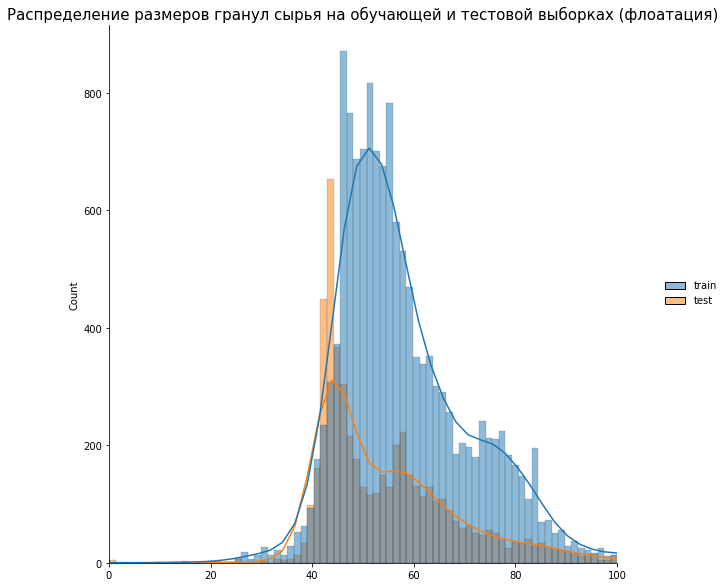

In [18]:
sns.displot(feeds, legend=True, kde=True, height=8)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (флоатация)', fontsize=15)
plt.xlim([0, 100])
plt.show()

In [19]:
#Размер гранул перед первичной очисткой на обучающей, и тестовой выборках
feeds_size = pd.concat([train['primary_cleaner.input.feed_size'], 
                                     test['primary_cleaner.input.feed_size']], axis=1) 
feeds_size.columns = ['train', 'test']
feeds_size.describe()

,train,test
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


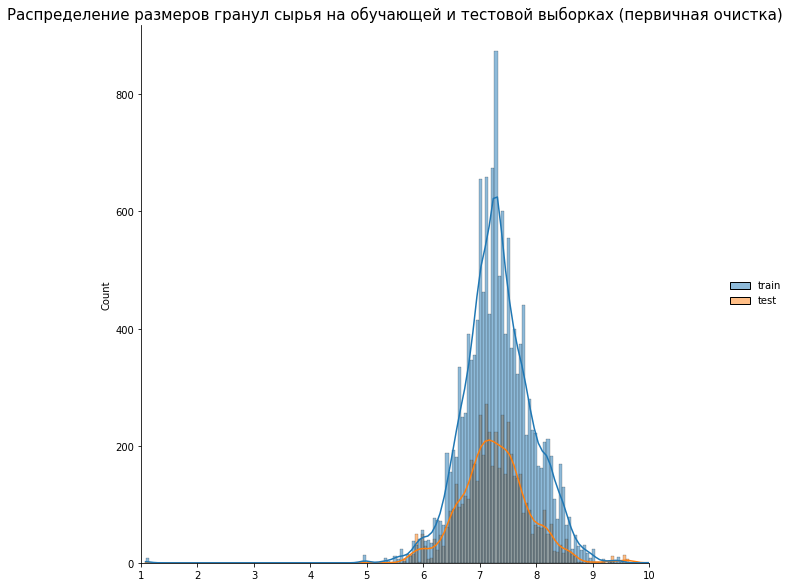

In [20]:
sns.displot(feeds_size, legend=True, kde=True, height=8)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (первичная очистка)', fontsize=15)
plt.xlim([1 , 10])
plt.show()

Вывод:

Распределения размеров гранул сырья на обучающей и тестовой выборках слабо отличаются и не должны влиять на оценку модели.

### Концентрация всех веществ на разных стадиях

In [21]:
# Суммарная концентрация четырей веществ на каждой стадии
final_output_concentrate_sum_train = (train['final.output.concentrate_au'] + 
                                      train['final.output.concentrate_ag'] + 
                                      train['final.output.concentrate_pb'] +
                                      train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (train['primary_cleaner.output.concentrate_au'] + 
                                                train['primary_cleaner.output.concentrate_ag'] + 
                                                train['primary_cleaner.output.concentrate_pb'] +
                                                train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (train['rougher.output.concentrate_au'] + 
                                        train['rougher.output.concentrate_ag'] + 
                                        train['rougher.output.concentrate_pb'] +
                                        train['rougher.output.concentrate_sol'])
rougher_input_concentrate_sum_train = (train['rougher.input.feed_au'] + 
                                        train['rougher.input.feed_ag'] + 
                                        train['rougher.input.feed_pb'] +
                                        train['rougher.input.feed_sol'])


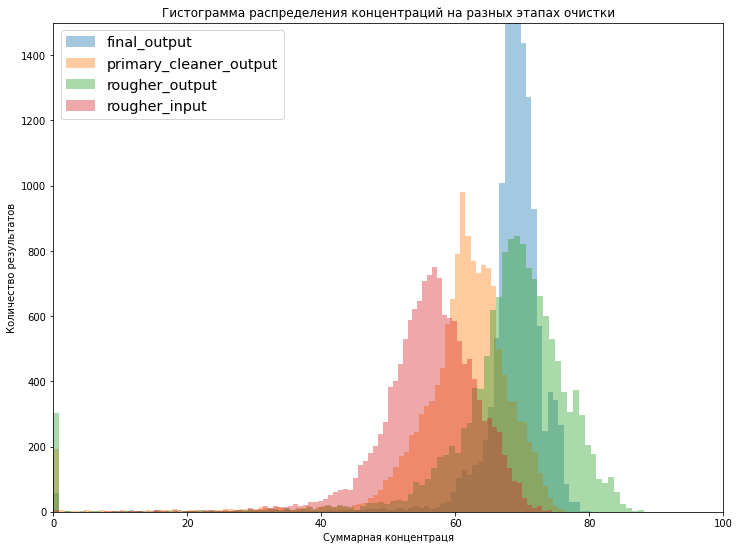

In [22]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.4)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)
plt.hist(rougher_input_concentrate_sum_train, bins=100, label = 'rougher_input', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

In [23]:
train = train.drop(index = train[train["rougher.input.feed_au"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.input.feed_ag"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.input.feed_pb"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.input.feed_sol"] < 1].index,
                   axis = 0)


train = train.drop(index = train[train["rougher.output.concentrate_au"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.output.concentrate_ag"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.output.concentrate_pb"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["rougher.output.concentrate_sol"] < 1].index,
                   axis = 0)

train = train.drop(index = train[train["primary_cleaner.output.concentrate_au"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["primary_cleaner.output.concentrate_ag"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["primary_cleaner.output.concentrate_pb"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["primary_cleaner.output.concentrate_sol"] < 1].index,
                   axis = 0)

train = train.drop(index = train[train["final.output.concentrate_au"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["final.output.concentrate_ag"] < 1].index,
                   axis = 0)
train = train.drop(index = train[train["final.output.concentrate_sol"] < 1].index,
                   axis = 0)
train.shape

(13304, 86)

In [24]:
final_output_concentrate_sum_train = (train['final.output.concentrate_au'] + 
                                      train['final.output.concentrate_ag'] + 
                                      train['final.output.concentrate_pb'] +
                                      train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (train['primary_cleaner.output.concentrate_au'] + 
                                                train['primary_cleaner.output.concentrate_ag'] + 
                                                train['primary_cleaner.output.concentrate_pb'] +
                                                train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (train['rougher.output.concentrate_au'] + 
                                        train['rougher.output.concentrate_ag'] + 
                                        train['rougher.output.concentrate_pb'] +
                                        train['rougher.output.concentrate_sol'])
rougher_input_concentrate_sum_train = (train['rougher.input.feed_au'] + 
                                        train['rougher.input.feed_ag'] + 
                                        train['rougher.input.feed_pb'] +
                                        train['rougher.input.feed_sol'])

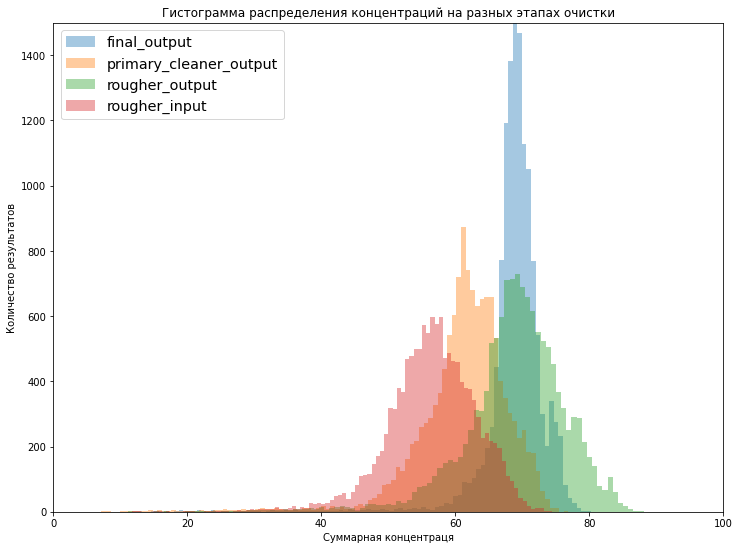

In [25]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.4)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)
plt.hist(rougher_input_concentrate_sum_train, bins=100, label = 'rougher_input', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Аномалии выявили и удалили. Данные готовы для построения модели

## Модель

In [26]:
def smape(target, predictions):
    return ((1/len(target)) * np.sum(2 * np.abs(target - predictions) / (np.abs(target) + np.abs(predictions)))) * 100



def final_smape (smape_rougher, smape_final):
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

In [27]:
scorer = make_scorer(smape, greater_is_better=False)

In [28]:
#Из обучающей выборки удалим признаки отсутствующие в тестовой.
train = train[list(test.columns)]

In [29]:
# Разделим датафреймы на features и target
# train
target_rougher_train = train['rougher.output.recovery']
target_final_train = train['final.output.recovery']
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

# test
target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)


In [30]:
#Обучим и оценим модель линейной регрессии

cross_val_score_rougher = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()
cross_val_score_final = cross_val_score(LinearRegression(),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()
total_smape_result = final_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', total_smape_result)

Итоговое sMAPE: -9.824901403060347


In [31]:
#Обучим и оценим модель регрессии дерева решений
cross_val_score_rougher = cross_val_score(DecisionTreeRegressor(random_state=19191),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()
cross_val_score_final = cross_val_score(DecisionTreeRegressor(random_state=19191),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()
total_smape_result = final_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', total_smape_result)

Итоговое sMAPE: -13.545737461807914


In [32]:
#Обучим и оценим модель случайного леса
for estimator in range(25, 26):   
    model = RandomForestRegressor(random_state=19191, 
                                       n_estimators=estimator)
    scorer = make_scorer(smape) 
    
    cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=4, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=4, scoring=scorer).mean()

    total_smape_result = final_smape(cross_val_score_rougher, cross_val_score_final)
    print('Итоговое sMAPE:', total_smape_result)

Итоговое sMAPE: 9.426451873012585


Лучшей оказалась модель случайного леса, т.к. sMAPE меньше, чем у остальных

In [33]:
model_final = RandomForestRegressor(random_state=19191, 
                                       n_estimators=25)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

print('Итоговое sMAPE:', final_smape(smape_rougher, smape_final))

Итоговое sMAPE: 9.219442357055735


In [34]:
# Проверка модели на адекватность
# Создадим константную модель с помошью DummyRegressor
model = DummyRegressor(strategy='mean')

model.fit(features_train, target_rougher_train)
predictions_rougher = model.predict(features_test)

model.fit(features_train, target_final_train)
predictions_final = model.predict(features_test)

smape_rougher= smape(target_rougher_test, predictions_rougher)
smape_final= smape(target_final_test, predictions_final)

print('Итоговое sMAPE', final_smape(smape_rougher, smape_final))

Итоговое sMAPE 9.74499284619471


sMAPE на построенной модели меньше, чем на константной, следовательно, модель адекватна

## Общий вывод:
* Обработаны исходные данные: заполнены пропуски, установлен целевой признак, удалены аномалии 
* Установленно, что мере прохождения стадий технологического процесса доля золота и свинца увеличивается, а серебра уменьшается
* Проведено сравнение распределений размеров гранул сырья для обучающей и тестовой выборок: данные сопоставимы
* Были оценены 3 модели регрессии. Лучшая модель - Случайный лес - была определена по минимальному значению sMAPE: 9.42 на обучающих данных и 9.22 на тестовых
* Модель прошла проверку на адекватность